Index(['neutral', 'worry', 'happiness', 'sadness', 'love', 'surprise', 'fun',
       'relief', 'hate', 'empty', 'enthusiasm', 'boredom', 'anger'],
      dtype='object', name='sentiment')
[8638 8459 5209 5165 3842 2187 1776 1526 1323  827  759  179  110]


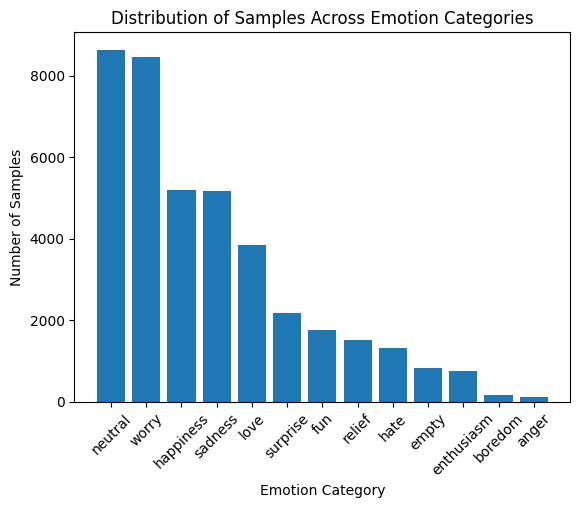

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

DATA = pd.read_csv('tweet_emotions.csv')

emotionIndex = DATA['sentiment'].value_counts()

x=emotionIndex.index
y=emotionIndex.values

plt.bar(x, y)
print (x)
print(y)
plt.xlabel('Emotion Category')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Emotion Categories')
plt.xticks(rotation=45)
plt.show()

In [61]:
category_tweets = {}
for index, row in enumerate(DATA['content']):
    category = DATA['sentiment'][index]
    text = row
    if category in category_tweets:
        category_tweets[category] += " "+text
    else:
        category_tweets[category] = " "+text
        
category_tweets

{'empty': " @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[ @creyes middle school and elem. High schools will remain open for those who need credits to graduate. Cali is broken @djmicdamn hey yu lil fucker i textd yu @softtouchme just answered you- never learned how to write in French- just basic stuff- Have a headache  I'm going to bed. Goodnight! @DymeDiva23 Nite. Now I'm up n bored as opposed to almost sleep frm b 4 @TheTombert i was watching Harpers Island, lol... there was no vodka involved @tarng Trudy's off Burnet...the one up north that no one goes to @msz_rockstar umm how bout em?..aint get 2 see da game  but i see dey survived anotha game of da series due to notin but Lebron im guessin I need to be sleeping.. But i'm not even tired.. 0 @exortabreedoll what happen to the maids of yours? Quit once again? ... went to the beach and it started raining wut do i do now???? Needs a new phone Is ANYBODY up? .... I'm sooo bored! intentando i

In [64]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
keywords = {}

for category,text in category_tweets.items():
    text = re.sub(r'http\S+|www.\S+|@\w+|#', '', text) 
    text = text.lower()
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    keywords[category] = filtered_tokens
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    

for category, words in keywords.items():
    word_freq = nltk.FreqDist(words)
    common_words = word_freq.most_common(10)
    print(f"Top 10 keywords in category '{category}':")
    for word, freq in common_words:
        print(f"{word}: {freq}")




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 keywords in category 'empty':
get: 40
bored: 38
quot: 38
work: 37
go: 37
got: 33
day: 32
im: 29
today: 29
home: 27
Top 10 keywords in category 'sadness':
sad: 383
day: 345
miss: 341
work: 332
go: 310
get: 301
today: 283
like: 279
got: 263
im: 249
Top 10 keywords in category 'enthusiasm':
good: 55
go: 55
get: 45
want: 44
day: 39
today: 37
got: 37
quot: 37
work: 35
like: 34
Top 10 keywords in category 'neutral':
quot: 386
get: 371
go: 370
day: 368
good: 359
work: 337
like: 335
going: 314
got: 312
one: 301
Top 10 keywords in category 'worry':
get: 539
like: 454
got: 454
go: 452
day: 429
good: 392
work: 391
going: 383
today: 376
know: 360
Top 10 keywords in category 'surprise':
quot: 167
day: 127
oh: 119
get: 117
got: 107
good: 97
like: 96
know: 95
really: 93
see: 88
Top 10 keywords in category 'love':
love: 864
day: 777
happy: 601
good: 323
mother: 300
mothers: 299
quot: 207
thanks: 194
like: 185
u: 182
Top 10 keywords in category 'fun':
lol: 188
fun: 143
quot: 123
good: 114
haha: 

In [65]:

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Perform POS tagging
for category, text in keywords.items():
    
    pos_tags = nltk.pos_tag(text, 'universal')
    tag_fd = nltk.FreqDist(tag for (word, tag) in pos_tags)
    common_tags = tag_fd.most_common(5)
    print(f"Top 5 dominant POS tags in category '{category}':")
    for tag, freq in common_tags:
        print(f"{tag}: {freq}")
        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Top 5 dominant POS tags in category 'empty':
NOUN: 2117
VERB: 1242
ADJ: 939
ADV: 359
ADP: 95
Top 5 dominant POS tags in category 'sadness':
NOUN: 15650
VERB: 9258
ADJ: 7715
ADV: 2985
ADP: 793
Top 5 dominant POS tags in category 'enthusiasm':
NOUN: 2271
VERB: 1358
ADJ: 1095
ADV: 403
ADP: 90
Top 5 dominant POS tags in category 'neutral':
NOUN: 22120
VERB: 12162
ADJ: 9772
ADV: 3701
ADP: 1030
Top 5 dominant POS tags in category 'worry':
NOUN: 25545
VERB: 15679
ADJ: 12628
ADV: 4836
ADP: 1399
Top 5 dominant POS tags in category 'surprise':
NOUN: 6566
VERB: 3676
ADJ: 3247
ADV: 1164
ADP: 322
Top 5 dominant POS tags in category 'love':
NOUN: 12384
ADJ: 6056
VERB: 5933
ADV: 1913
ADP: 598
Top 5 dominant POS tags in category 'fun':
NOUN: 6046
VERB: 3184
ADJ: 2855
ADV: 1002
ADP: 276
Top 5 dominant POS tags in category 'hate':
NOUN: 4465
VERB: 2453
ADJ: 1986
ADV: 706
ADP: 223
Top 5 dominant POS tags in category 'happiness':
NOUN: 16773
VERB: 8539
ADJ: 8317
ADV: 2771
ADP: 724
Top 5 dominant POS tags 

In [66]:
import nltk
import pandas as pd
from nltk.corpus import wordnet


unmatched_tokens = {}

for category, terms in keywords.items():
    unmatched_terms = []
    for term in terms:
        if not wordnet.synsets(term):
            unmatched_terms.append(term)
    if unmatched_terms:
        unmatched_tokens[category] = unmatched_terms

total_tokens = sum(len(terms) for terms in keywords.values())

percentage_unmatched = {category: (len(terms) / total_tokens) * 100 for category, terms in unmatched_tokens.items()}

# Create a summary table
summary_table = pd.DataFrame({
    'Category': list(percentage_unmatched.keys()),
    'Unmatched Tokens': [len(terms) for terms in unmatched_tokens.values()],
    'Percentage Unmatched': list(percentage_unmatched.values())
})

print(summary_table)


      Category  Unmatched Tokens  Percentage Unmatched
0        empty               826              0.299686
1      sadness              5367              1.947232
2   enthusiasm               798              0.289527
3      neutral              8172              2.964930
4        worry              8699              3.156134
5     surprise              2576              0.934613
6         love              4367              1.584416
7          fun              2523              0.915384
8         hate              1531              0.555471
9    happiness              6150              2.231317
10     boredom               205              0.074377
11      relief              1535              0.556922
12       anger               146              0.052971


In [67]:
import os
from scipy.stats import pearsonr
nrc_lexicon = {}

lexicon_directory = r'E:\Oulu University\Semester 1\Period 1\NLP\project\Project\NRC-Emotion-Lexicon 1\OneFilePerEmotion'

for filename in os.listdir(lexicon_directory):
    if filename.endswith('.txt'):
        with open(os.path.join(lexicon_directory, filename), 'r') as file:
            # Read each line in the file
            for line in file:
                word, emotion = line.strip().split('\t')
                nrc_lexicon[word] = emotion


l_values = {}
for index, row in DATA.iterrows():
    # Extract the text from the DataFrame
    text = row['content']

    category_counts = {}

    words = text.split()

    for word in words:
        if word in nrc_lexicon:
            emotion = nrc_lexicon[word]

            if emotion in category_counts:
                category_counts[emotion] += 1
            else:
                category_counts[emotion] = 1

    l_values[index] = category_counts

v1_vectors = {}
v2_vectors = {}
emotion_categories = list(set(nrc_lexicon.values()))
print(emotion_categories)

for emotion in emotion_categories:
    v1_vector = []
    v2_vector = []

    for index, counts in l_values.items():
        v1_vector.append(1 if emotion in counts else 0)

        v2_vector.append(counts.get(emotion, 0))

    v1_vectors[emotion] = v1_vector
    v2_vectors[emotion] = v2_vector

correlation_results = {}
for emotion in emotion_categories:
    correlation, p_value = pearsonr(v1_vectors[emotion], v2_vectors[emotion])
    correlation_results[emotion] = {'Correlation': correlation, 'P-Value': p_value}

for emotion, results in correlation_results.items():
    print(f"Emotion Category: {emotion}")
    print(f"Pearson Correlation: {results['Correlation']}")
    print(f"P-Value: {results['P-Value']}")

    

['1', '0']
Emotion Category: 1
Pearson Correlation: 0.9231755821219687
P-Value: 0.0
Emotion Category: 0
Pearson Correlation: 0.6410476992913763
P-Value: 0.0


In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import mysql.connector
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

category_sentiments = {}

categories = DATA['sentiment'].unique()

for category in categories:
    category_title = category
    sentiment_scores = analyzer.polarity_scores(category_title)

    sentiment = 'positive' if sentiment_scores['compound'] > 0.05 else 'negative' if sentiment_scores['compound'] < -0.05 else 'neutral'
    category_sentiments[category_title] = sentiment

sentiment_matching_scores = {}

conn = mysql.connector.connect(
    host='localhost',
    user='NLP_Project',
    password='1234',
    database='NLP_Project'
)
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS SentimentMatching (
        Category VARCHAR(255) PRIMARY KEY,
        SentimentMatchingScore INT
    )
''')

for index, row in DATA.iterrows():
    text = row['content']
    sentiment_scores = analyzer.polarity_scores(text)

    sentiment = 'positive' if sentiment_scores['compound'] > 0.05 else 'negative' if sentiment_scores['compound'] < -0.05 else 'neutral'

    category_title = row['sentiment']

    if category_title in category_sentiments:
        expected_sentiment = category_sentiments[category_title]

        if sentiment == expected_sentiment:
            sentiment_matching_scores[category_title] = sentiment_matching_scores.get(category_title, 0) + 1

unique_categories = DATA['sentiment'].unique()
for category in unique_categories:
    if category not in sentiment_matching_scores:
        sentiment_matching_scores[category] = 0

for category, score in sentiment_matching_scores.items():
    cursor.execute('INSERT IGNORE INTO SentimentMatching (Category, SentimentMatchingScore) VALUES (%s, %s)', (category, score))

conn.commit()
conn.close()

total_records_by_category = DATA['sentiment'].value_counts().to_dict()

for category in sentiment_matching_scores:
    sentiment_matching_scores[category] /= total_records_by_category.get(category, 1)
    sentiment_matching_scores[category] *= 100

# Create a DataFrame to present the results
result_table = pd.DataFrame(list(sentiment_matching_scores.items()), columns=['Category', 'Sentiment Matching Score (%)'])

print(result_table)




# Love has the most Sentiment Matching Score in (%) "79.310345"

ModuleNotFoundError: No module named 'mysql'

In [36]:
import subprocess
import mysql.connector
import pandas as pd

senti_strength_jar = "C:/Users/HP/Desktop/Study/NLP/Project/SentiStrength/SentiStrengthCom.jar"
senti_strength_data = "C:/Users/HP/Desktop/Study/NLP/Project/SentiStrength/SentStrength_Data_Sept2011/"

category_sentiments = {}

categories = DATA['sentiment'].unique()

for category in categories:
    category_title = category
    result = subprocess.run(['java', '-jar', senti_strength_jar, 'sentidata', senti_strength_data, 'text', category_title], stdout=subprocess.PIPE, text=True)
    sentiment_result = result.stdout.strip()

    sentiment = 'positive' if sentiment_result.startswith('3') else 'negative' if sentiment_result.startswith('-3') else 'neutral'
    category_sentiments[category_title] = sentiment

sentiment_matching_scores = {}

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='NLP_Project',
    password='1234',
    database='NLP_Project'
)
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS SentimentMatching (
        Category VARCHAR(255) PRIMARY KEY,
        SentimentMatchingScore INT
    )
''')

for index, row in DATA.iterrows():
    text = row['content']
    # Call SentiStrength using subprocess and capture its output
    result = subprocess.run(['java', '-jar', senti_strength_jar, 'sentidata', senti_strength_data, 'text', text], stdout=subprocess.PIPE, text=True)
    sentiment_result = result.stdout.strip()

    # Determine sentiment based on the SentiStrength result
    sentiment = 'positive' if sentiment_result.startswith('3') else 'negative' if sentiment_result.startswith('-3') else 'neutral'

    category_title = row['sentiment']

    if category_title in category_sentiments:
        expected_sentiment = category_sentiments[category_title]

        if sentiment == expected_sentiment:
            sentiment_matching_scores[category_title] = sentiment_matching_scores.get(category_title, 0) + 1

unique_categories = DATA['sentiment'].unique()
for category in unique_categories:
    if category not in sentiment_matching_scores:
        sentiment_matching_scores[category] = 0

for category, score in sentiment_matching_scores.items():
    cursor.execute('INSERT IGNORE INTO SentimentMatching (Category, SentimentMatchingScore) VALUES (%s, %s)', (category, score))

conn.commit()
conn.close()

total_records_by_category = DATA['sentiment'].value_counts().to_dict()

# Calculate the sentiment matching score in percentage
for category in sentiment_matching_scores:
    sentiment_matching_scores[category] /= total_records_by_category.get(category, 1)
    sentiment_matching_scores[category] *= 100

# Create a DataFrame to present the results
result_table = pd.DataFrame(list(sentiment_matching_scores.items()), columns=['Category', 'Sentiment Matching Score (%)'])

# Print the result table
print(result_table)


ModuleNotFoundError: No module named 'mysql'

In [69]:
import pandas as pd
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import WordNetError
import itertools

DATA = pd.read_csv('tweet_emotions.csv')
categories = DATA['sentiment'].unique()

def wu_palmer_similarity(category1, category2):
    try:
        synsets1 = wordnet.synsets(category1)
        synsets2 = wordnet.synsets(category2)
        
        max_similarity = -1
        
        for synset1, synset2 in itertools.product(synsets1, synsets2):
            similarity = synset1.wup_similarity(synset2)
            if similarity is not None and similarity > max_similarity:
                max_similarity = similarity
        
        return max_similarity
    except WordNetError:
        return 0

similarity_data = []

for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        category1 = categories[i]
        category2 = categories[j]
        similarity_score = wu_palmer_similarity(category1, category2)
        similarity_data.append([category1, category2, similarity_score])

similarity_df = pd.DataFrame(similarity_data, columns=['Category1', 'Category2', 'SimilarityScore'])

low_similarity_threshold = 0.8

merging_suggestions = []

for index, row in similarity_df.iterrows():
    if 0.0 < row['SimilarityScore'] < low_similarity_threshold:
        small_category = row['Category1']
        relevant_category = row['Category2']
        similarity_score = row['SimilarityScore']
        merging_suggestions.append((small_category, relevant_category, similarity_score))

suggestions_df = pd.DataFrame(merging_suggestions, columns=['Category', 'Relevant Category', 'Cosin Similarity Score'])

print(suggestions_df)


     Category Relevant Category  Cosin Similarity Score
0       empty           sadness                0.250000
1       empty        enthusiasm                0.222222
2       empty           neutral                0.500000
3       empty             worry                0.500000
4       empty          surprise                0.400000
..        ...               ...                     ...
59  happiness           boredom                0.625000
60  happiness            relief                0.714286
61    boredom            relief                0.555556
62    boredom             anger                0.588235
63     relief             anger                0.666667

[64 rows x 3 columns]


In [70]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('tweet_emotions.csv')


model = Word2Vec(df['content'], vector_size=100, window=5, min_count=1, sg=0)

category_embeddings = {}
for category in df['sentiment'].unique():
    category_tweets = df[df['sentiment'] == category]['content']
    category_embedding = sum(model.wv[word] for tweet in category_tweets for word in tweet) / len(category_tweets)
    category_embeddings[category] = category_embedding

similarities = cosine_similarity([category_embeddings[cat] for cat in df['sentiment'].unique()])

similarity_matrix = pd.DataFrame(similarities, columns=df['sentiment'].unique(), index=df['sentiment'].unique())

threshold = 0.8

merge_suggestions = {}
for category in df['sentiment'].unique():
    similar_categories = similarity_matrix[category][similarity_matrix[category] > threshold].index.tolist()
    if len(similar_categories) > 1:
        merge_suggestions[category] = similar_categories

for category, similar in merge_suggestions.items():
    print(f"Merge {category} with {', '.join(similar)}")



Merge empty with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge sadness with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge enthusiasm with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge neutral with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge worry with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge surprise with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge love with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge fun with empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger
Merge hate with

In [51]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('tweet_emotions.csv')

model = Word2Vec(df['content'], vector_size=100, window=5, min_count=1, sg=0)

record_embeddings = {}
for index, row in df.iterrows():
    content = row['content']
    record_embedding = sum(model.wv[word] for word in content) / len(content)
    record_embeddings[index] = record_embedding

category_embeddings = {}
for category in df['sentiment'].unique():
    category_records = df[df['sentiment'] == category]
    category_embedding = sum(record_embeddings[index] for index in category_records.index) / len(category_records)
    category_embeddings[category] = category_embedding

record_based_similarity = cosine_similarity([category_embeddings[cat] for cat in df['sentiment'].unique()])

title_embeddings = {}
for category in df['sentiment'].unique():
    title = category
    title_embedding = sum(model.wv[word] for word in title) / len(title)
    title_embeddings[category] = title_embedding

title_based_similarity = cosine_similarity([title_embeddings[cat] for cat in df['sentiment'].unique()])

record_based_similarity_matrix = pd.DataFrame(record_based_similarity, columns=df['sentiment'].unique(), index=df['sentiment'].unique())
title_based_similarity_matrix = pd.DataFrame(title_based_similarity, columns=df['sentiment'].unique(), index=df['sentiment'].unique())

matching_pairs = []
for category in df['sentiment'].unique():
    record_based_best_match = record_based_similarity_matrix[category].idxmax()
    title_based_best_match = title_based_similarity_matrix[category].idxmax()
    if record_based_best_match == title_based_best_match:
        matching_pairs.append((category, record_based_best_match))

for pair in matching_pairs:
    print(f"Matching Category Pair: {pair[0]} - {pair[1]}")



Matching Category Pair: sadness - sadness
Matching Category Pair: enthusiasm - enthusiasm
Matching Category Pair: neutral - neutral
Matching Category Pair: worry - worry
Matching Category Pair: surprise - surprise
Matching Category Pair: love - love
Matching Category Pair: fun - fun
Matching Category Pair: hate - hate
Matching Category Pair: happiness - happiness
Matching Category Pair: boredom - boredom
Matching Category Pair: relief - relief
Matching Category Pair: anger - anger


In [71]:
from gensim.models import Word2Vec

# Load your preprocessed text corpus
corpus = open('preprocessed_tweet_corpus.txt').read().split()

# Train the Word2Vec model
model = Word2Vec(
    sentences=[corpus],  
    vector_size=100,     
    window=5,            
    min_count=1,         
    sg=0,                
)

model.save("word2vec_model")



In [78]:
import pandas as pd
import gensim
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

word2vec_model = gensim.models.Word2Vec.load('word2vec_model')


DATA = pd.read_csv('tweet_emotions.csv')

def calculate_average_embedding(text, model):
    words = text.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

DATA['content_embedding'] = DATA['content'].apply(lambda x: calculate_average_embedding(x, word2vec_model))

categories = DATA['sentiment'].unique()


category_embeddings = {}


for category in categories:
    category_records = DATA[DATA['sentiment'] == category]['content_embedding'].tolist()
    
    if category_records:
        category_embeddings[category] = np.mean(category_records, axis=0)
    else:
        category_embeddings[category] = np.zeros(word2vec_model.vector_size)

record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        record_similarity_matrix.loc[category1, category2] = similarity


def calculate_record_similarity(category1, category2):
    if category1 in category_embeddings and category2 in category_embeddings:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        return similarity
    else:
        return 0.0  


record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = calculate_record_similarity(category1, category2)
        record_similarity_matrix.loc[category1, category2] = similarity


title_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

def calculate_title_similarity(category1, category2):
    title1 = DATA[DATA['sentiment'] == category1]['content'].values
    title2 = DATA[DATA['sentiment'] == category2]['content'].values

    if len(title1) > 0 and len(title2) > 0:
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(np.concatenate((title1, title2)))
        similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
        return similarity
    else:
        return 0.0

for category1 in categories:
    for category2 in categories:
        similarity = calculate_title_similarity(category1, category2)
        title_similarity_matrix.loc[category1, category2] = similarity


matching = {}

for category1 in categories:
    max_record_similarity_category = record_similarity_matrix.loc[category1].astype(float).idxmax()
    max_title_similarity_category = title_similarity_matrix.loc[category1].astype(float).idxmax()
    
    matching[category1] = {
        'max_record_similarity_category': max_record_similarity_category,
        'max_title_similarity_category': max_title_similarity_category,
        'match': max_record_similarity_category == max_title_similarity_category
    }


for category, data in matching.items():
    print(f"Category: {category}")
    print(f"Max Title Similarity Category: {data['max_title_similarity_category']}")
    print(f"Match: {data['match']}")


Category: empty
Max Title Similarity Category: anger
Match: False
Category: sadness
Max Title Similarity Category: empty
Match: False
Category: enthusiasm
Max Title Similarity Category: anger
Match: False
Category: neutral
Max Title Similarity Category: empty
Match: False
Category: worry
Max Title Similarity Category: empty
Match: False
Category: surprise
Max Title Similarity Category: empty
Match: False
Category: love
Max Title Similarity Category: empty
Match: False
Category: fun
Max Title Similarity Category: empty
Match: False
Category: hate
Max Title Similarity Category: anger
Match: False
Category: happiness
Max Title Similarity Category: neutral
Match: False
Category: boredom
Max Title Similarity Category: empty
Match: False
Category: relief
Max Title Similarity Category: empty
Match: False
Category: anger
Max Title Similarity Category: empty
Match: False


In [80]:
import pandas as pd
import numpy as np
import spacy


nlp = spacy.load('en_core_web_md')

DATA = pd.read_csv('tweet_emotions.csv')


def calculate_average_embedding(text, model):
    words = text.split()
    embeddings = []
    for word in words:
        if word in model.vocab:
            embeddings.append(model(word).vector)
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vocab.vectors.shape[1])

# Calculate the embedding for each record in the dataset
DATA['content_embedding'] = DATA['content'].apply(lambda x: calculate_average_embedding(x, nlp))


categories = DATA['sentiment'].unique()

# 
category_embeddings = {}


for category in categories:
    category_records = DATA[DATA['sentiment'] == category]['content_embedding'].tolist()
    
    if category_records:
        category_embeddings[category] = np.mean(category_records, axis=0)
    else:
        category_embeddings[category] = np.zeros(nlp.vocab.vectors.shape[1])


record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = np.dot(category_embeddings[category1], category_embeddings[category2]) / (np.linalg.norm(category_embeddings[category1]) * np.linalg.norm(category_embeddings[category2]))
        record_similarity_matrix.loc[category1, category2] = similarity


def calculate_record_similarity(category1, category2):
    if category1 in category_embeddings and category2 in category_embeddings:
        similarity = np.dot(category_embeddings[category1], category_embeddings[category2]) / (np.linalg.norm(category_embeddings[category1]) * np.linalg.norm(category_embeddings[category2]))
        return similarity
    else:
        return 0.0  

record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = calculate_record_similarity(category1, category2)
        record_similarity_matrix.loc[category1, category2] = similarity

title_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

def calculate_title_similarity(category1, category2):
    title1 = DATA[DATA['sentiment'] == category1]['content'].values
    title2 = DATA[DATA['sentiment'] == category2]['content'].values

    if len(title1) > 0 and len(title2) > 0:
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(np.concatenate((title1, title2)))
        similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
        return similarity
    else:
        return 0.0

for category1 in categories:
    for category2 in categories:
        similarity = calculate_title_similarity(category1, category2)
        title_similarity_matrix.loc[category1, category2] = similarity


matching = {}

for category1 in categories:
    max_record_similarity_category = record_similarity_matrix.loc[category1].astype(float).idxmax()
    max_title_similarity_category = title_similarity_matrix.loc[category1].astype(float).idxmax()
    
    matching[category1] = {
        'max_title_similarity_category': max_title_similarity_category,
        'match': max_record_similarity_category == max_title_similarity_category
    }


for category, data in matching.items():
    print(f"Category: {category}")
    print(f"Max Title Similarity Category: {data['max_title_similarity_category']}")
    print(f"Match: {data['match']}")


OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

In [8]:
from gensim.models import FastText

corpus = open('preprocessed_tweet_corpus.txt', 'r').read()

tokens = corpus.split()  


model = FastText([tokens], vector_size=100, window=5, min_count=1, sg=0)

model.save("fasttext_model")



In [14]:
import pandas as pd
import numpy as np
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


fasttext_model = gensim.models.FastText.load('fasttext_model')

DATA = pd.read_csv('tweet_emotions.csv')


def calculate_average_embedding(text, model):
    words = text.split()
    embeddings = []
    for word in words:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

DATA['content_embedding'] = DATA['content'].apply(lambda x: calculate_average_embedding(x, fasttext_model))


categories = DATA['sentiment'].unique()


category_embeddings = {}


for category in categories:
    category_records = DATA[DATA['sentiment'] == category]['content_embedding'].tolist()
    
    if category_records:
        category_embeddings[category] = np.mean(category_records, axis=0)
    else:
        category_embeddings[category] = np.zeros(fasttext_model.vector_size)

record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        record_similarity_matrix.loc[category1, category2] = similarity

def calculate_record_similarity(category1, category2):
    if category1 in category_embeddings and category2 in category_embeddings:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        return similarity
    else:
        return 0.0  


record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = calculate_record_similarity(category1, category2)
        record_similarity_matrix.loc[category1, category2] = similarity


title_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

def calculate_title_similarity(category1, category2):
    title1 = DATA[DATA['sentiment'] == category1]['content'].values
    title2 = DATA[DATA['sentiment'] == category2]['content'].values

    if len(title1) > 0 and len(title2) > 0:
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(np.concatenate((title1, title2)))
        similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
        return similarity
    else:
        return 0

for category1 in categories:
    for category2 in categories:
        similarity = calculate_title_similarity(category1, category2)
        title_similarity_matrix.loc[category1, category2] = similarity


matching = {}

for category1 in categories:
    max_record_similarity_category = record_similarity_matrix.loc[category1].astype(float).idxmax()
    max_title_similarity_category = title_similarity_matrix.loc[category1].astype(float).idxmax()
    
    matching[category1] = {
        'max_title_similarity_category': max_title_similarity_category,
        'match': max_record_similarity_category == max_title_similarity_category
    }

for category, data in matching.items():
    print(f"Category: {category}")
    print(f"Max Title Similarity Category: {data['max_title_similarity_category']}")
    print(f"Match: {data['match']}")


Category: sadness
Max Title Similarity Category: sadness
Match: True
Category: enthusiasm
Max Title Similarity Category: fun
Match: False
Category: neutral
Max Title Similarity Category: sadness
Match: False
Category: worry
Max Title Similarity Category: sadness
Match: False
Category: surprise
Max Title Similarity Category: sadness
Match: False
Category: love
Max Title Similarity Category: sadness
Match: False
Category: fun
Max Title Similarity Category: sadness
Match: False
Category: hate
Max Title Similarity Category: relief
Match: False
Category: happiness
Max Title Similarity Category: fun
Match: False
Category: boredom
Max Title Similarity Category: sadness
Match: False
Category: relief
Max Title Similarity Category: sadness
Match: False
Category: anger
Max Title Similarity Category: sadness
Match: False


In [15]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import KeyedVectors


corpus = [line.strip().split() for line in open('preprocessed_tweet_corpus.txt', 'r', encoding='ISO-8859-1').readlines()]


documents = [TaggedDocument(words=sentence, tags=[str(i)]) for i, sentence in enumerate(corpus)]


doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10, dm=1)  # Adjust the parameters as needed
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)


doc2vec_model.save("doc2vec_model")



In [17]:
import pandas as pd
import numpy as np
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer


doc2vec_model = Doc2Vec.load('doc2vec_model')

DATA = pd.read_csv('tweet_emotions.csv')


def calculate_document_embedding(text, model):
    tagged_doc = TaggedDocument(words=text.split(), tags=['text'])
    embedding = model.infer_vector(tagged_doc.words)
    return embedding

DATA['content_embedding'] = DATA['content'].apply(lambda x: calculate_document_embedding(x, doc2vec_model))

categories = DATA['sentiment'].unique()


category_embeddings = {}


for category in categories:
    category_records = DATA[DATA['sentiment'] == category]['content_embedding'].tolist()
    
    if category_records:
        category_embeddings[category] = np.mean(category_records, axis=0)
    else:
        category_embeddings[category] = np.zeros(doc2vec_model.vector_size)

record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        record_similarity_matrix.loc[category1, category2] = similarity

def calculate_record_similarity(category1, category2):
    if category1 in category_embeddings and category2 in category_embeddings:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        return similarity
    else:
        return 0

record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = calculate_record_similarity(category1, category2)
        record_similarity_matrix.loc[category1, category2] = similarity


title_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

def calculate_title_similarity(category1, category2):
    title1 = DATA[DATA['sentiment'] == category1]['content'].values
    title2 = DATA[DATA['sentiment'] == category2]['content'].values

    if len(title1) > 0 and len(title2) > 0:
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(np.concatenate((title1, title2)))
        similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
        return similarity
    else:
        return 0.0

for category1 in categories:
    for category2 in categories:
        similarity = calculate_title_similarity(category1, category2)
        title_similarity_matrix.loc[category1, category2] = similarity


matching = {}

for category1 in categories:
    max_record_similarity_category = record_similarity_matrix.loc[category1].astype(float).idxmax()
    max_title_similarity_category = title_similarity_matrix.loc[category1].astype(float).idxmax()
    
    matching[category1] = {
        'max_title_similarity_category': max_title_similarity_category,
        'match': max_record_similarity_category == max_title_similarity_category
    }


for category, data in matching.items():
    print(f"Category: {category}")
    print(f"Max Title Similarity Category: {data['max_title_similarity_category']}")
    print(f"Match: {data['match']}")


Category: sadness
Max Title Similarity Category: sadness
Match: True
Category: enthusiasm
Max Title Similarity Category: fun
Match: False
Category: neutral
Max Title Similarity Category: sadness
Match: False
Category: worry
Max Title Similarity Category: sadness
Match: False
Category: surprise
Max Title Similarity Category: sadness
Match: False
Category: love
Max Title Similarity Category: sadness
Match: False
Category: fun
Max Title Similarity Category: sadness
Match: False
Category: hate
Max Title Similarity Category: relief
Match: False
Category: happiness
Max Title Similarity Category: fun
Match: False
Category: boredom
Max Title Similarity Category: sadness
Match: False
Category: relief
Max Title Similarity Category: sadness
Match: False
Category: anger
Max Title Similarity Category: sadness
Match: False


In [1]:
from transformers import BertTokenizer, BertModel


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

C:\Users\HP\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [5]:
import pandas as pd
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel

DATA = pd.read_csv('tweet_emotions.csv')


def calculate_bert_embedding(text, model, tokenizer):

    tokens = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    

    with torch.no_grad():
        outputs = model(**tokens)
    embedding = torch.mean(outputs.last_hidden_state, dim=1).squeeze().numpy()
    
    return embedding

DATA['content_embedding'] = DATA['content'].apply(lambda x: calculate_bert_embedding(x, model, tokenizer))

categories = DATA['sentiment'].unique()


category_embeddings = {}


for category in categories:
    category_records = DATA[DATA['sentiment'] == category]['content_embedding'].tolist()
    
    if category_records:
        category_embeddings[category] = np.mean(category_records, axis=0)
    else:
        category_embeddings[category] = np.zeros(len(category_records[0]))

record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        record_similarity_matrix.loc[category1, category2] = similarity

def calculate_record_similarity(category1, category2):
    if category1 in category_embeddings and category2 in category_embeddings:
        similarity = cosine_similarity([category_embeddings[category1]], [category_embeddings[category2]])[0][0]
        return similarity
    else:
        return 0


record_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for category1 in categories:
    for category2 in categories:
        similarity = calculate_record_similarity(category1, category2)
        record_similarity_matrix.loc[category1, category2] = similarity

title_similarity_matrix = pd.DataFrame(index=categories, columns=categories)

def calculate_title_similarity(category1, category2):
    title1 = DATA[DATA['sentiment'] == category1]['content'].values
    title2 = DATA[DATA['sentiment'] == category2]['content'].values

    if len(title1) > 0 and len(title2) > 0:
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(np.concatenate((title1, title2)))
        similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
        return similarity
    else:
        return 0.0

for category1 in categories:
    for category2 in categories:
        similarity = calculate_title_similarity(category1, category2)
        title_similarity_matrix.loc[category1, category2] = similarity


matching = {}

for category1 in categories:
    max_record_similarity_category = record_similarity_matrix.loc[category1].astype(float).idxmax()
    max_title_similarity_category = title_similarity_matrix.loc[category1].astype(float).idxmax()
    
    matching[category1] = {
        'max_title_similarity_category': max_title_similarity_category,
        'match': max_record_similarity_category == max_title_similarity_category
    }

for category, data in matching.items():
    print(f"Category: {category}")
    print(f"Max Title Similarity Category: {data['max_title_similarity_category']}")
    print(f"Match: {data['match']}")


Category: sadness
Max Title Similarity Category: sadness
Match: True
Category: enthusiasm
Max Title Similarity Category: fun
Match: False
Category: neutral
Max Title Similarity Category: sadness
Match: False
Category: worry
Max Title Similarity Category: sadness
Match: False
Category: surprise
Max Title Similarity Category: sadness
Match: False
Category: love
Max Title Similarity Category: sadness
Match: False
Category: fun
Max Title Similarity Category: sadness
Match: False
Category: hate
Max Title Similarity Category: relief
Match: False
Category: happiness
Max Title Similarity Category: fun
Match: False
Category: boredom
Max Title Similarity Category: sadness
Match: False
Category: relief
Max Title Similarity Category: sadness
Match: False
Category: anger
Max Title Similarity Category: sadness
Match: False


In [82]:
from transformers import AutoTokenizer, AutoModel

model_name = "vinai/bertweet-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
import torch
import numpy as np

# Calculate record embeddings
record_embeddings = {}
for index, row in df.iterrows():
    content = row['content']
    inputs = tokenizer(content, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    record_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    record_embeddings[index] = record_embedding

# Calculate category embeddings based on record embeddings
category_embeddings = {}
for category in df['sentiment'].unique():
    category_records = df[df['sentiment'] == category]
    category_embedding = np.mean([record_embeddings[index] for index in category_records.index], axis=0)
    category_embeddings[category] = category_embedding
    
from sklearn.metrics.pairwise import cosine_similarity

record_based_similarity = cosine_similarity([category_embeddings[cat] for cat in df['sentiment'].unique()])
title_embeddings = {}
for category in df['sentiment'].unique():
    title = category
    inputs = tokenizer(title, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    title_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    title_embeddings[category] = title_embedding

title_based_similarity = cosine_similarity([title_embeddings[cat] for cat in df['sentiment'].unique()])
import pandas as pd

record_based_similarity_matrix = pd.DataFrame(record_based_similarity, columns=df['sentiment'].unique(), index=df['sentiment'].unique())
title_based_similarity_matrix = pd.DataFrame(title_based_similarity, columns=df['sentiment'].unique(), index=df['sentiment'].unique())

matching_pairs = []
for category in df['sentiment'].unique():
    print(record_based_similarity_matrix[category])
    record_based_best_match = record_based_similarity_matrix[category].idxmax()
    title_based_best_match = title_based_similarity_matrix[category].idxmax()
    if record_based_best_match == title_based_best_match:
        matching_pairs.append((category, record_based_best_match))



emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


empty         1.000000
sadness       0.994249
enthusiasm    0.995773
neutral       0.999395
worry         0.994867
surprise      0.995965
love          0.990111
fun           0.992908
hate          0.993460
happiness     0.993422
boredom       0.991194
relief        0.994602
anger         0.993947
Name: empty, dtype: float32
empty         0.994249
sadness       1.000000
enthusiasm    0.994137
neutral       0.992826
worry         0.999273
surprise      0.994693
love          0.989280
fun           0.991609
hate          0.997524
happiness     0.991481
boredom       0.995736
relief        0.995986
anger         0.996412
Name: sadness, dtype: float32
empty         0.995773
sadness       0.994137
enthusiasm    1.000000
neutral       0.996437
worry         0.995846
surprise      0.998059
love          0.994678
fun           0.998241
hate          0.992915
happiness     0.998107
boredom       0.988756
relief        0.997733
anger         0.994006
Name: enthusiasm, dtype: float32
empty       